# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

# Some Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
    
To Guage Feature Importance

In [34]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

seed = 100

In [35]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:
#Read input file and understand the data
# "default" is my dependent variable
df_pre = pd.read_csv("credit_data.csv")

In [37]:
df_pre.shape

(1000, 21)

In [38]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [39]:
df_pre.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [42]:
df_pre.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [44]:
# Randomly select 50% data for this use case
from sklearn.model_selection import train_test_split
out_data,df =train_test_split(df_pre, train_size = 0.5,random_state=5)
df_pre.shape
df_pre.columns
df_pre.head(5)

(1000, 21)

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## George's Tip
- When a df is supplied, df's are outputted; when X, y arrays are supplied...

In [45]:
out_data.shape, df.shape

((500, 21), (500, 21))

In [46]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
544,no checking account,critical account/ other credits existing (not ...,car (new),... < 100 DM,.. >= 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
515,< 0 DM,critical account/ other credits existing (not ...,car (new),... < 100 DM,4 <= ... < 7 years,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,own,skilled employee / official,none,no
193,no checking account,existing credits paid back duly till now,domestic appliances,... < 100 DM,4 <= ... < 7 years,male : married/widowed,none,real estate,none,rent,skilled employee / official,none,yes
11,< 0 DM,existing credits paid back duly till now,business,... < 100 DM,... < 1 year,female : divorced/separated/married,none,if not A121 : building society savings agreeme...,none,rent,skilled employee / official,none,yes
279,no checking account,existing credits paid back duly till now,domestic appliances,100 <= ... < 500 DM,1 <= ... < 4 years,male : single,none,"if not A121/A122 : car or other, not in attrib...",none,rent,management/ self-employed/ highly qualified em...,"yes, registered under the customers name",yes


In [50]:
dff=pd.get_dummies(df, columns=['account_check_status','credit_history','purpose','savings',
       'present_emp_since','personal_status_sex', 'other_debtors','property','other_installment_plans', 'housing','job','foreign_worker'])

## George's Challenge
- Less typing, how?
- Hint: need all cols except `telephone`

In [51]:
dff.shape

(500, 61)

## George's Tip
- Meaningful variable names please!

## George's Challenge
- Why did the shape change?

In [52]:
dff.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
default,1.000000,0.189013,0.070793,0.076910,-0.018783,-0.208031,-7.768506e-02,-0.007942,0.095893,0.242513,...,0.064980,0.015202,-0.082987,0.084166,-5.401936e-02,0.073887,0.012342,-0.046812,-0.090511,0.090511
duration_in_month,0.189013,1.000000,0.583234,0.132995,0.038559,-0.047340,-1.173177e-02,0.047776,0.053787,0.078898,...,0.125984,0.160763,-0.068555,-0.043901,1.127425e-01,0.098934,-0.010218,-0.210945,-0.107492,0.107492
credit_amount,0.070793,0.583234,1.000000,-0.293030,0.008133,-0.021072,-2.379818e-02,0.096744,0.079207,0.033106,...,0.042606,0.120961,-0.068282,-0.013754,2.420019e-01,-0.036624,-0.000716,-0.163578,-0.001604,0.001604
installment_as_income_perc,0.076910,0.132995,-0.293030,1.000000,0.049682,0.074678,9.279230e-02,-0.054737,-0.056638,0.049035,...,0.032360,0.072975,0.031787,-0.092549,3.636871e-02,0.072912,-0.148908,-0.059748,-0.081714,0.081714
present_res_since,-0.018783,0.038559,0.008133,0.049682,1.000000,0.264617,6.319960e-02,0.036469,-0.052684,0.054668,...,-0.097724,0.226768,-0.290726,0.162059,3.685817e-02,-0.020635,-0.036524,0.007409,-0.046633,0.046633
age,-0.208031,-0.047340,-0.021072,0.074678,0.264617,1.000000,1.575504e-01,0.131840,-0.069895,-0.046800,...,-0.048782,0.275606,0.036990,-0.253642,1.709221e-01,-0.162066,0.070415,0.019335,0.005439,-0.005439
credits_this_bank,-0.077685,-0.011732,-0.023798,0.092792,0.063200,0.157550,1.000000e+00,0.110503,-0.032241,-0.023891,...,-0.013791,-0.004673,0.055764,-0.060799,-1.018924e-02,-0.019019,0.039991,0.015736,0.023410,-0.023410
people_under_maintenance,-0.007942,0.047776,0.096744,-0.054737,0.036469,0.131840,1.105033e-01,1.000000,-0.081756,0.107083,...,-0.012726,0.162010,-0.031423,-0.087722,1.485457e-02,-0.075011,-0.036318,0.091192,0.009501,-0.009501
account_check_status_0 <= ... < 200 DM,0.095893,0.053787,0.079207,-0.056638,-0.052684,-0.069895,-3.224129e-02,-0.081756,1.000000,-0.360488,...,0.006225,-0.018983,0.014783,-0.002537,4.993417e-02,-0.090940,0.075069,0.036303,-0.035726,0.035726
account_check_status_< 0 DM,0.242513,0.078898,0.033106,0.049035,0.054668,-0.046800,-2.389092e-02,0.107083,-0.360488,1.000000,...,-0.042612,0.092733,-0.128686,0.077583,-2.466761e-02,0.030012,-0.042746,0.002116,0.084764,-0.084764


In [56]:
dff.corr()[dff.corr() > .55]

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
default,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_in_month,NaN,1.000000,0.583234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,NaN,0.583234,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_as_income_perc,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
present_res_since,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credits_this_bank,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_under_maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_0 <= ... < 200 DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_check_status_< 0 DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df > .55

In [53]:
# Lets check for highly correlated variables
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor< -0.55)]

credit_amount                                            duration_in_month                                                             0.583234
credit_history_existing credits paid back duly till now  credit_history_critical account/ other credits existing (not at this bank)   -0.670328
savings_unknown/ no savings account                      savings_... < 100 DM                                                         -0.609828
personal_status_sex_male : single                        personal_status_sex_female : divorced/separated/married                      -0.766802
other_debtors_none                                       other_debtors_co-applicant                                                   -0.678394
                                                         other_debtors_guarantor                                                      -0.690725
other_installment_plans_none                             other_installment_plans_bank                                                 -0

## George's Challenge
- A different take using visualization

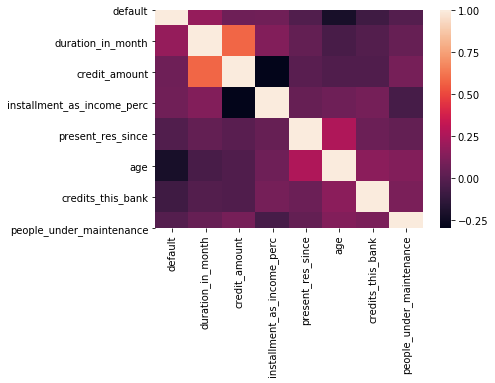

In [59]:
sns.heatmap(dff.select_dtypes(include=['int64']).corr())

In [61]:
dff.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

In [60]:
#Drop irrelavent data
dff=dff.drop(["telephone","foreign_worker_yes","job_unskilled - resident","housing_rent","other_installment_plans_bank",
              "other_debtors_co-applicant"],axis=1)

## George's Challenge
- Why drop `foreign_worker_yes`

In [16]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 54), (150, 54), (350,), (150,))

## George's Challenge
- Does it matter what number to use as seed?

In [17]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [18]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

## George's Challenge
- why `[:,1]`?

In [19]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [20]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[95  1]
 [42 12]]
0.7133333333333334


In [62]:
rf.feature_importances_

array([0.09291131, 0.09825235, 0.03769184, 0.03750189, 0.11097883,
       0.01797945, 0.01019753, 0.01483817, 0.03691705, 0.00909874,
       0.04359842, 0.00969599, 0.01677778, 0.00816764, 0.01414037,
       0.01491525, 0.0101294 , 0.00823364, 0.028585  , 0.00916224,
       0.01594812, 0.0004723 , 0.00084021, 0.01239584, 0.00091409,
       0.00163678, 0.00847463, 0.02546771, 0.01015382, 0.00610958,
       0.01493548, 0.01259218, 0.01567887, 0.01619735, 0.01406386,
       0.00526557, 0.01435102, 0.0056888 , 0.00978651, 0.01806131,
       0.00984562, 0.00909156, 0.01667464, 0.01796184, 0.01412525,
       0.00795239, 0.01685755, 0.00476404, 0.00720737, 0.01256398,
       0.01305665, 0.02216219, 0.00296197, 0.00596802])

In [63]:
np.argsort(importances)

array([21, 22, 24, 25, 52, 47, 35, 37, 53, 29, 48, 45, 13, 17, 26, 41,  9,
       19, 11, 38, 40, 16, 28,  6, 23, 49, 31, 50, 34, 44, 14, 36,  7, 15,
       30, 32, 20, 33, 42, 12, 46, 43,  5, 39, 51, 27, 18,  8,  3,  2, 10,
        0,  1,  4], dtype=int64)

In [64]:
[1, 2, 3][::-1]

[3, 2, 1]

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x1bf255829c8>,
 <a list of 15 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

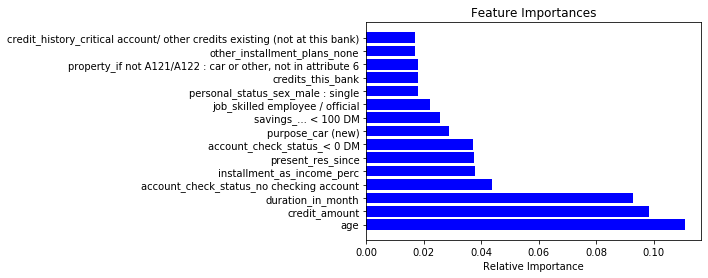

In [21]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## George's Tip
- `np.argsort(importances)[::-1][:15]`
- How is feature importance calculation

In [28]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [29]:
"Train Accuracy:"
(trainResult*100.0)

'Train Accuracy:'

100.0

In [30]:
"Test Accuracy:"
(testResult*100.0)

'Test Accuracy:'

71.33333333333334

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
num_folds = 10
seed = 77

In [33]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [26]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.7 , 0.76, 0.76, 0.86, 0.8 , 0.78, 0.82, 0.8 , 0.68, 0.78])

## George's Challenge
- why are we not using x_train, y_train...?

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
num_folds = 10
seed = 77

In [29]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [30]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

array([0.7 , 0.76, 0.76, 0.86, 0.8 , 0.78, 0.82, 0.8 , 0.68, 0.78])

In [31]:
np.mean(abs(results))

0.774

In [32]:
results.std()

0.05063595560468864

Leave One Out Cross-Validation

In [33]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [34]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_train, y_train, cv=LeaveOneOut())
scores

array([0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [35]:
scores.mean()

0.78

In [36]:
scores.std()

0.4142463035441596

# Stratified cross-validation( Bonus)

k-fold cross validation with stratification

## George's Challenge
- What's stratification?
- Why do we need it?

In [37]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [38]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.7798655462184874
Standard deviation:  0.01928092372203721


# Bootstrapping ( Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [39]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [40]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

## George's Challenge
- What's the bootstrap sample size?

In [41]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.688
Standard deviation:  0.014544949486180958


Inference:

Here crossfold validation with stratification gives better result than Bootstrapping.

## George's Challenge
- What are we doing here?
- Apples to apples?

## George's Bonus
- Gold standard in model testing
- Not always possible
- K to use 

## Links
- https://docs.google.com/spreadsheets/d/1y4EdxeAliOQw9CDHx0_brjmk-LUb3gfX52zLGSqLg_g/edit#gid=0